In [46]:
#purpose model mag uncertainty for point sources in the PANDAS survey
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matploltib inline

UsageError: Line magic function `%matploltib` not found.


In [163]:
df=pd.read_csv('/users/caganze/result_w9sh32lw5il5lpfl.tsv', sep='\t')

In [171]:
df=df[np.logical_and.reduce([df.g.values <27,\
                     df.i.values<27,
                     df.i.values >15, 
                    df.g.values >15])].reset_index(drop=True)

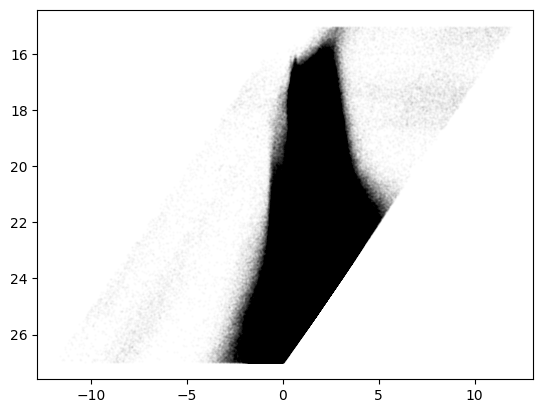

In [172]:
fig, ax=plt.subplots()
ax.scatter(df.g-df.i, df.i, s=1, alpha=0.01, c='k')
ax.invert_yaxis()

In [173]:
def power_law(x, alpha):
    return (x-25)**alpha

In [174]:
nans= np.logical_or(np.isnan(df.g.values), np.isnan(df.g.values))

In [191]:
pol=np.poly1d(np.polyfit(df.g.values, np.log10(df.dg).values, 3))
pol_i=np.poly1d(np.polyfit(df.i.values, np.log10(df.di).values, 3))

In [155]:

#param, param_cov = curve_fit(power_law, df.g.values[~nans], df.dg.values[~nans],
#                              p0=(3), bounds=(0, 10), method ='dogbox')

In [176]:
pol

poly1d([-1.65666510e-03,  1.19499350e-01, -2.53711966e+00,  1.35899029e+01])

In [177]:
xgrid=np.arange(15, 35)

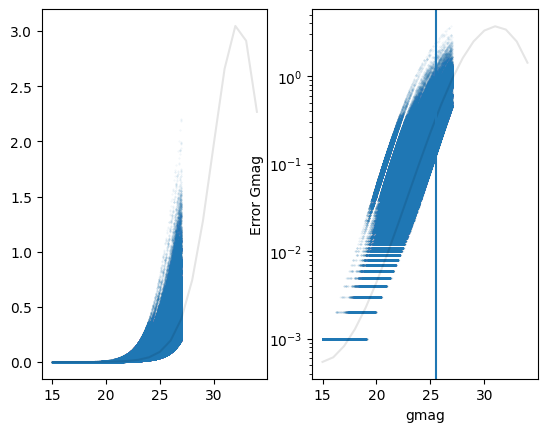

In [194]:
fig, ax=plt.subplots(ncols=2)
ax[0].scatter(df.g, df.dg, s=.1, alpha=0.1)
ax[0].plot(xgrid, 10**pol(xgrid), c='k', label='polynomial', alpha=0.1)
#ax.plot(xgrid, (xgrid-25)**0.5, c='r', label='powerlaw')

ax[1].scatter(df.i, df.di, s=.1, alpha=0.1)
ax[1].plot(xgrid, 10**pol_i(xgrid), c='k', label='polynomial', alpha=0.1)

ax[1].set(ylabel='Error Gmag', xlabel='gmag', yscale='log')
ax[1].set(ylabel='Error Gmag', xlabel='gmag', yscale='log')
ax[1].axvline(25.5)

In [196]:
pol

poly1d([-1.65666510e-03,  1.19499350e-01, -2.53711966e+00,  1.35899029e+01])

In [197]:
pol_i

poly1d([-1.79810511e-03,  1.23934230e-01, -2.49265894e+00,  1.23087386e+01])

In [ ]:
pol_i